<a href="https://colab.research.google.com/github/HanaTounakti/Food-sales-predictions/blob/main/Project_1_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
filename = '/content/drive/MyDrive/sales_predictions_2023.csv'
df = pd.read_csv(filename)
df.head()

Mounted at /content/drive


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Part 2:

1) How many rows and columns?



In [3]:
df.shape

(8523, 12)

In [4]:
print(f'rows :{df.shape[0]}')
print(f'columns :{df.shape[1]}')

rows :8523
columns :12


2) What are the datatypes of each variable?



In [5]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

3) Are there duplicates? If so, drop any duplicates.



In [6]:
df.duplicated().sum()

0

4) Identify missing values.



In [7]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).



In [8]:
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

will finn in the Item_weight with the average value

In [9]:
median_ItemWeight=df['Item_Weight'].median()

In [10]:
df['Item_Weight'].fillna(median_ItemWeight, inplace=True)

the outlet size can impact the sales prediction so will keep the rows and add missing value

In [11]:
mostcom_outletsize=df['Outlet_Size'].mode()
mostcom_outletsize

0    Medium
Name: Outlet_Size, dtype: object

In [12]:
df['Outlet_Size'].fillna("missing", inplace=True)

In [13]:
df['Outlet_Size']=df['Outlet_Size'].replace("missing", "Medium")

6) Confirm that there are no missing values after addressing them.



In [14]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent)



In [15]:
df["Item_Identifier"].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [16]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [17]:
df.replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg':'Regular'},inplace=True)

In [18]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [19]:
df["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [20]:
df["Outlet_Identifier"].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [21]:
df["Outlet_Size"].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [22]:
df["Outlet_Location_Type"].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [23]:
df["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [24]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [25]:
df['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [26]:
df['Item_Outlet_Sales'].value_counts()

958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
4124.6310     1
6622.7126     1
1614.5650     1
5602.7070     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

In [27]:
df['Item_MRP'].value_counts()

172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
           ..
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: Item_MRP, Length: 5938, dtype: int64

8) For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [28]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


Part3: visualization

Histogram to view the distributions of various features in your dataset.

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

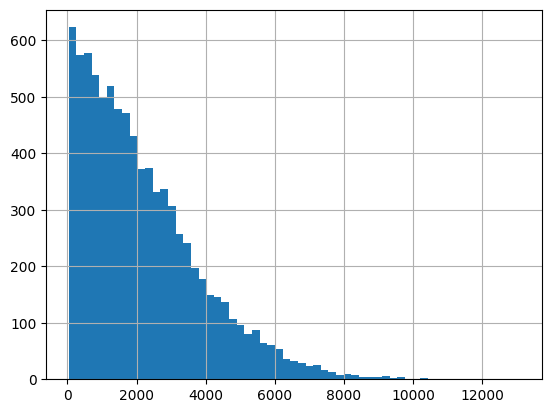

In [30]:
df['Item_Outlet_Sales'].hist(bins='auto')

**how can we make the Item type readable?**

<Axes: xlabel='Item_Type', ylabel='Count'>

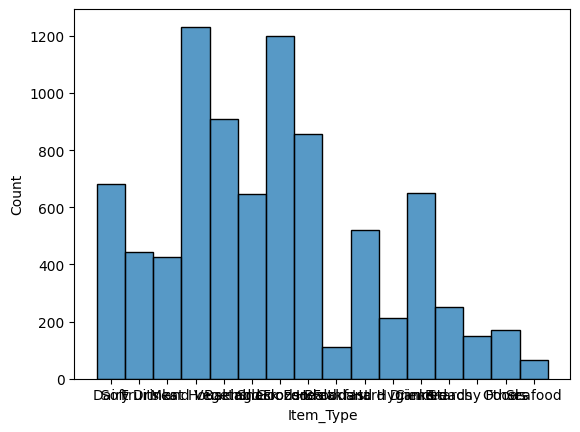

In [34]:
sns.histplot(data=df, x='Item_Type', y=None, hue=None,  stat='count', bins='auto')

<Axes: >

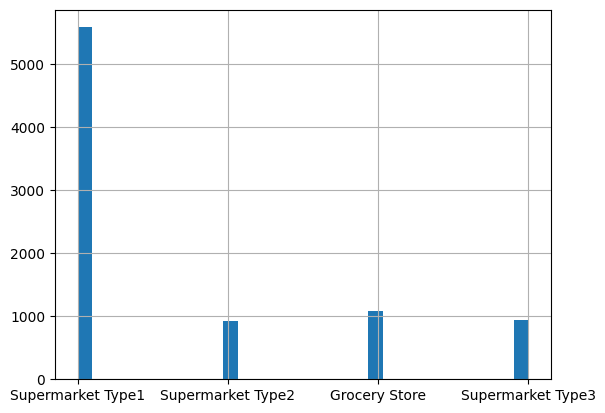

In [35]:
df['Outlet_Type'].hist(bins='auto')

<Axes: >

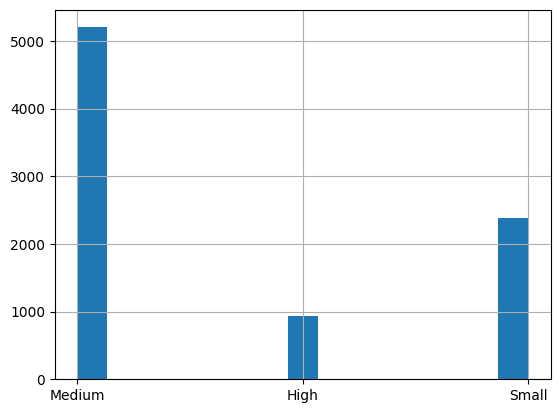

In [37]:
df['Outlet_Size'].hist(bins='auto')

Boxplot to view statistical summaries of various features in your dataset.

In [38]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

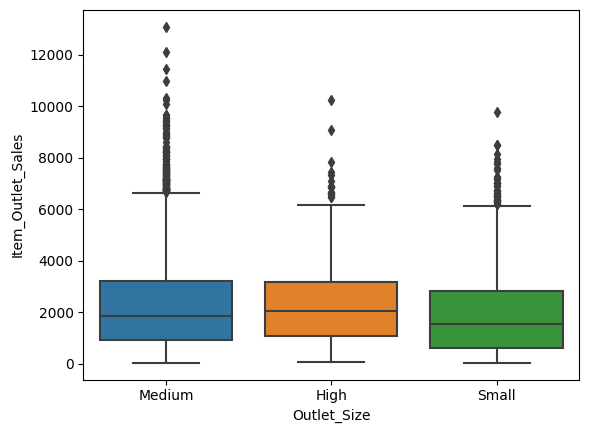

In [39]:
sns.boxplot(data=df, y='Item_Outlet_Sales', x='Outlet_Size')

<Axes: xlabel='Outlet_Type', ylabel='Item_Visibility'>

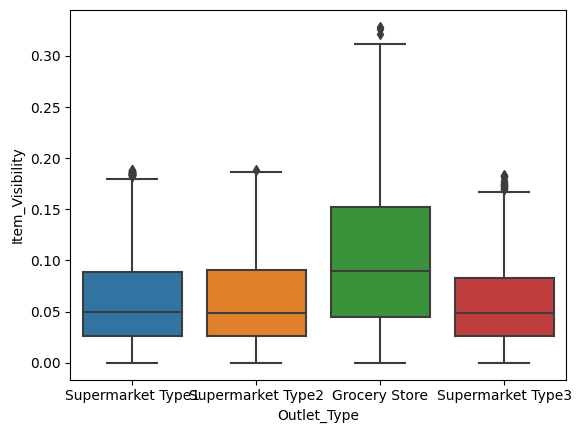

In [40]:
sns.boxplot(data=df, x='Outlet_Type', y='Item_Visibility')

Heatmap of the correlation between features.

In [41]:
corr_df = df.corr()
corr_df

<ipython-input-41-e9476d57cd4e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.corr()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014168,0.024951,0.007739,0.009693
Item_Visibility,-0.014168,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024951,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.007739,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.009693,-0.128625,0.567574,-0.049135,1.000000


<Axes: >

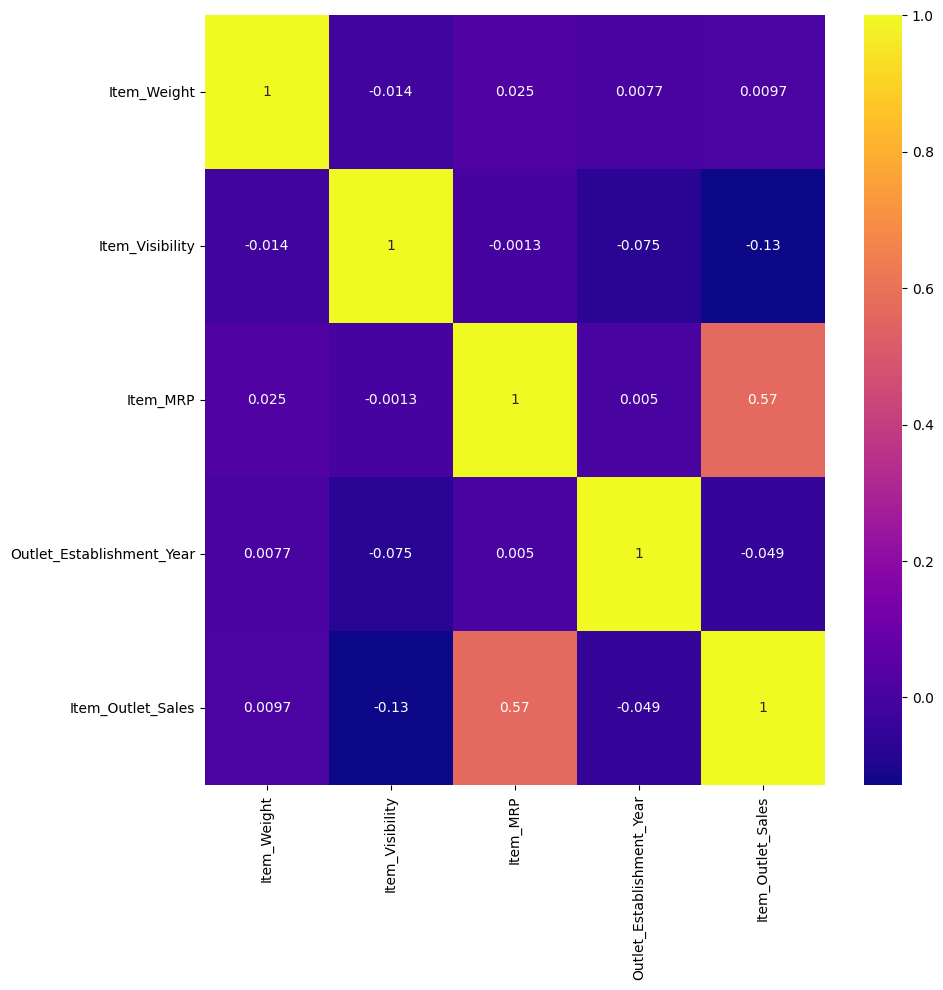

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_df, cmap='plasma', annot=True)

 two data visualizations that help to understand trends in the data (explanatory data analysis)

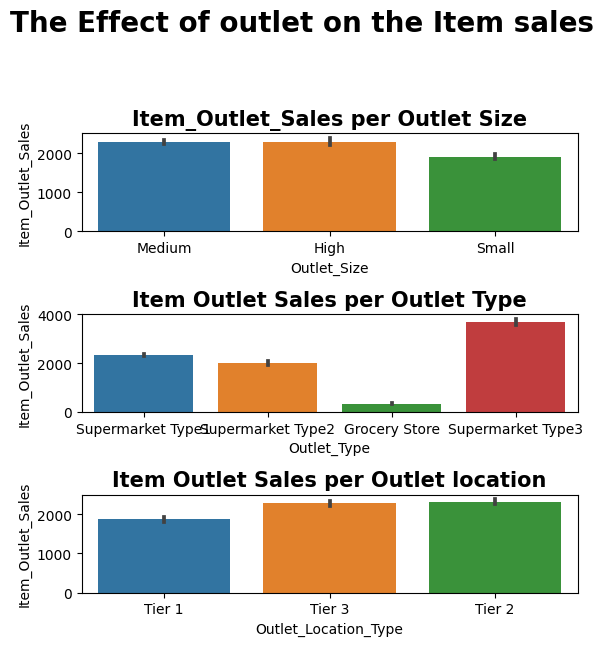

In [53]:
fig, axes = plt.subplots(nrows=3, figsize=(6,6))
sns.barplot(data=df, x='Outlet_Size', y='Item_Outlet_Sales', ax=axes[0])
axes[0].set_title('Item_Outlet_Sales per Outlet Size', fontsize=15, fontweight='bold')

sns.barplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales', ax=axes[1])
axes[1].set_title('Item Outlet Sales per Outlet Type', fontsize=15, fontweight='bold')

sns.barplot(data=df, x='Outlet_Location_Type', y='Item_Outlet_Sales', ax=axes[2])
axes[2].set_title('Item Outlet Sales per Outlet location', fontsize=15, fontweight='bold')

fig.suptitle('The Effect of outlet on the Item sales',fontsize=20,fontweight='bold', y=1.07)

fig.tight_layout()

the outlet type is the most impacting parameter on the item sales. Supermarket type 3 seems the biggest one that's why they have the highest item sales value.

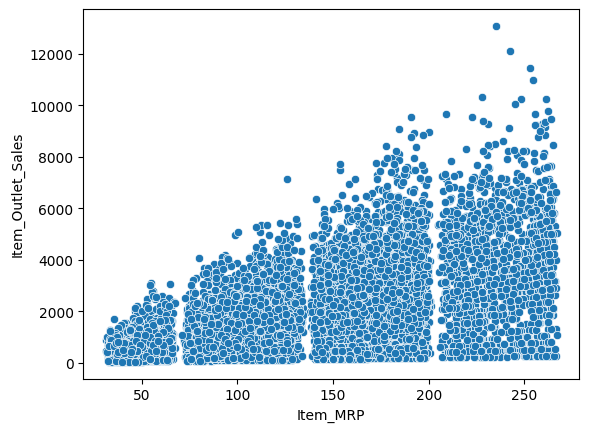

In [67]:
#based on the heatmap the only corrolation is between Item MRP and Item Outlet sales
sns.scatterplot(data=df, x='Item_MRP', y='Item_Outlet_Sales');

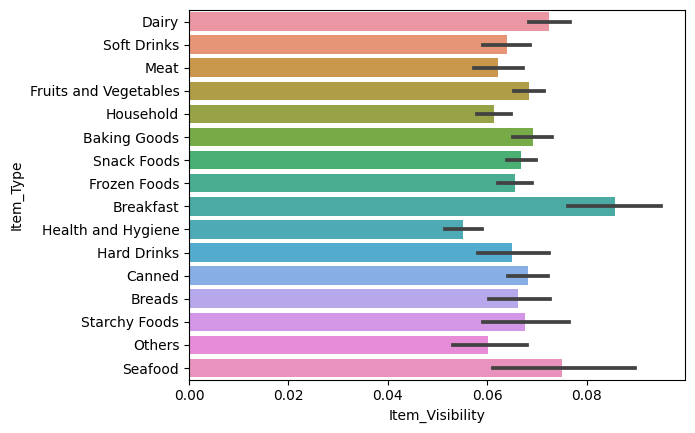

In [58]:
sns.barplot(data=df, x='Item_Visibility', y='Item_Type');

Breakfast Items has the most visibilitybut do'nt have the most item sales value

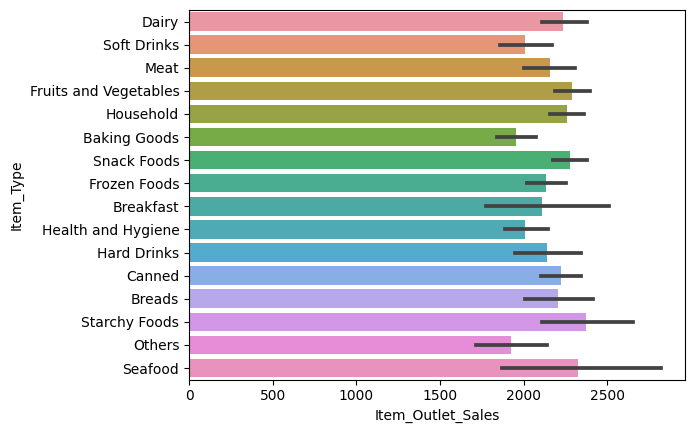

In [59]:
sns.barplot(data=df, x='Item_Outlet_Sales', y='Item_Type');